In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

lang = pd.read_csv('language_data.csv')

print(lang.head(5))

       city  year    total
0  KOKO MAA  1990  4998478
1  KOKO MAA  1991  5029002
2  KOKO MAA  1992  5054982
3  KOKO MAA  1993  5077912
4  KOKO MAA  1994  5098754


In [2]:
# I'll pivot the table, turning the years into columns

piv = lang.pivot(index='city', columns='year', values='total').reset_index().rename_axis(None,axis='columns')
print(piv)

          city   1990   1991   1992   1993   1994   1995   1996   1997   1998  \
0         Akaa  16048  16096  16201  16142  16038  15986  15924  15840  15857   
1     Alajärvi  11963  11982  12023  11992  11985  11890  11874  11803  11720   
2    Alavieska   3072   3060   3053   3097   3084   3051   3054   3064   3029   
3       Alavus  13785  13781  13744  13690  13623  13472  13341  13330  13299   
4     Asikkala   8822   8790   8828   8842   8761   8782   8728   8694   8609   
..         ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
305  Ylivieska  13053  13284  13383  13431  13536  13521  13435  13357  13263   
306   Ylöjärvi  23434  23712  23922  24137  24232  24223  24439  24582  24805   
307      Ypäjä   2801   2802   2789   2758   2742   2748   2787   2779   2780   
308     Ähtäri   7814   7778   7790   7732   7681   7598   7515   7440   7393   
309  Äänekoski  21121  21188  21096  21173  21162  21129  21080  21005  20975   

     ...   2011   2012   20

In [3]:
# I'll check for possible NULL values in the dataframe

isN = piv.isnull()
rowHasNull = isN.any(axis=1)
print(piv[rowHasNull])

Empty DataFrame
Columns: [city, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Index: []

[0 rows x 32 columns]


In [4]:
# I'll calculate the relative change in population compared to year 1990 by city.

chg = piv
for index, row in chg.iterrows():
    for year in range(2020,1989,-1):
        chg.loc[index,year] = 100*row[year]/row[1990]-100

# I'm also sorting the values by the change, with the sum row on top.

chg['wholeCountry'] = np.where(chg['city']=='KOKO MAA', 1, 0)
chg = piv.sort_values(by=['wholeCountry',2020], ascending=[False, True])

chg = chg.drop(columns='wholeCountry')
chg = chg.reset_index(drop=True)

chg.head()

,city,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,KOKO MAA,0,0.610666,1.130424,1.589164,2.006131,2.367681,2.677655,2.978327,3.224341,...,8.058233,8.566528,9.058597,9.468382,9.779577,10.099454,10.296174,10.391983,10.539488,10.709560
1,Rautavaara,0,-1.645952,-2.317770,-3.392677,-5.072220,-6.650991,-9.136715,-11.588848,-14.074572,...,-37.924085,-39.099765,-40.073900,-40.611354,-41.652670,-42.122943,-42.962714,-44.541485,-46.187437,-47.564662
2,Puolanka,0,-1.948052,-2.792208,-3.939394,-5.800866,-7.229437,-8.636364,-10.151515,-12.748918,...,-35.129870,-36.558442,-37.705628,-38.874459,-39.913420,-40.800866,-42.229437,-43.787879,-45.281385,-46.082251
3,Hyrynsalmi,0,-0.811608,-1.795376,-1.697000,-3.098869,-3.935071,-5.287752,-8.263650,-9.911461,...,-34.284309,-35.981308,-36.915888,-38.760453,-40.432858,-40.826365,-42.793901,-43.753074,-44.146581,-45.917364
4,Salla,0,-1.483490,-2.073696,-3.509332,-5.487319,-7.289839,-8.550008,-9.985644,-12.872866,...,-35.364492,-36.528952,-37.948636,-39.687350,-40.548732,-41.729143,-42.973361,-44.313288,-45.764875,-45.653214


In [22]:
# I'll calculate the number of cities whose population has increased/decreased.

inc = chg.loc[1:310, ['city',2020]]
inc['populationIncreased'] = np.where(inc[2020]>0, 1, 0)

inc.groupby(['populationIncreased']).count()

,city,2020
populationIncreased,,
0,218,218
1,91,91


In [6]:
# Conclusion: Just 91 out of the 309 cities have had a population increase between 1990 and 2020.

In [7]:
# I went through the data and chose some interesting cities to plot.

chg.loc[[0,1,77,163,213,243,276,305,309], :]

,city,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,KOKO MAA,0,0.610666,1.130424,1.589164,2.006131,2.367681,2.677655,2.978327,3.224341,...,8.058233,8.566528,9.058597,9.468382,9.779577,10.099454,10.296174,10.391983,10.539488,10.709560
1,Rautavaara,0,-1.645952,-2.317770,-3.392677,-5.072220,-6.650991,-9.136715,-11.588848,-14.074572,...,-37.924085,-39.099765,-40.073900,-40.611354,-41.652670,-42.122943,-42.962714,-44.541485,-46.187437,-47.564662
77,Hanko,0,-0.768022,-1.605865,-2.688078,-3.927387,-5.524524,-7.287485,-9.067900,-10.394484,...,-17.812882,-19.122011,-20.500960,-21.268982,-22.639204,-24.393437,-25.667656,-26.872054,-28.443009,-29.813231
163,Forssa,0,0.020346,0.198372,0.417091,0.198372,-0.600203,-1.653103,-2.726348,-4.084435,...,-9.292981,-9.832146,-10.137335,-10.879959,-11.383520,-11.841302,-12.589013,-13.387589,-14.033571,-14.547304
213,Pori,0,0.174579,0.083189,0.181609,0.314009,0.318695,0.248395,0.025777,-0.244880,...,-0.316352,-0.172236,0.059755,0.082017,0.017575,-0.338614,-0.891644,-1.107232,-1.656746,-1.949665
243,Hämeenlinna,0,0.594558,0.816700,0.870602,1.197282,1.401457,1.569697,1.929045,2.203456,...,9.878802,10.249583,10.754304,11.031982,11.089151,10.826174,10.519094,10.306752,10.471726,10.822907
276,Helsinki,0,1.044273,1.850934,3.287571,4.745126,6.626929,8.053006,9.537571,10.949838,...,20.914703,22.658002,24.424045,26.059098,27.580829,28.996954,30.640130,31.608855,32.785337,33.411860
305,Espoo,0,1.761581,3.721854,5.803196,8.039205,10.784978,13.688894,16.338506,18.729762,...,46.232093,48.772223,51.048202,53.822938,56.290079,59.059602,61.643756,64.301479,67.834489,69.609973
309,Liminka,0,3.961012,7.922024,10.431356,12.422231,14.392368,15.325591,16.258814,15.823310,...,90.045624,95.603484,98.610535,101.990875,106.076317,107.382829,110.141020,110.721692,111.343841,112.318540


In [8]:
# I'll transpose this dataframe to make it ready for plotting

toPlot = chg.loc[[0,1,77,163,213,243,276,305,309], :].set_index('city').T.rename_axis(None, axis=1)
toPlot.head()

,KOKO MAA,Rautavaara,Hanko,Forssa,Pori,Hämeenlinna,Helsinki,Espoo,Liminka
1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991,0.610666,-1.645952,-0.768022,0.020346,0.174579,0.594558,1.044273,1.761581,3.961012
1992,1.130424,-2.317770,-1.605865,0.198372,0.083189,0.816700,1.850934,3.721854,7.922024
1993,1.589164,-3.392677,-2.688078,0.417091,0.181609,0.870602,3.287571,5.803196,10.431356
1994,2.006131,-5.072220,-3.927387,0.198372,0.314009,1.197282,4.745126,8.039205,12.422231


In [9]:
# Also, I'm linearically extrapolating into year 2030, based on growth from 2015 through 2020

extra = chg.loc[[0,1,77,163,213,243,276,305,309], ["city", 2015, 2020]]
extrapolYear = 2030
extra[extrapolYear] = (extrapolYear*(extra[2020]-extra[2015])/5)+extra[2020]-(2020*(extra[2020]-extra[2015])/5)
extra = extra.set_index('city').T.rename_axis(None, axis=1)
extra = extra.drop(axis=0, index=2015)
extra.head()

,KOKO MAA,Rautavaara,Hanko,Forssa,Pori,Hämeenlinna,Helsinki,Espoo,Liminka
2020,10.709560,-47.564662,-29.813231,-14.547304,-1.949665,10.822907,33.411860,69.609973,112.318540
2030,12.569526,-59.388646,-44.161285,-20.874873,-5.884145,10.290418,45.073924,96.249761,124.802986


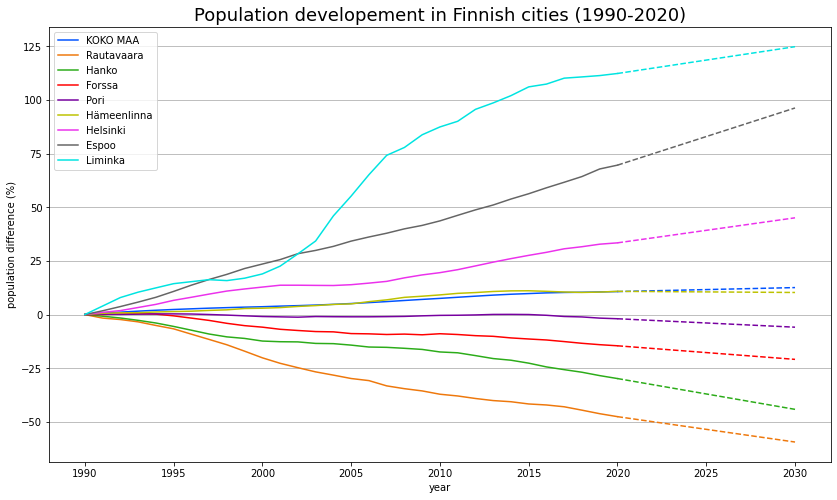

In [25]:
# All set for plotting

lineColors = ['#0053FF', '#EE780C', '#2CAC19', '#FF0000', '#7700A0', '#BDC200', '#EB31EC', '#656565', '#00E4E1']

plt.figure(figsize=(14,8))

colorIndex = 0
for col in toPlot:
    plt.plot(toPlot[col], label=col, color=lineColors[colorIndex])
    colorIndex += 1
colorIndex = 0
for col in extra:
    plt.plot(extra[col], color=lineColors[colorIndex], linestyle='--')
    colorIndex += 1
plt.get_current_fig_manager()

plt.legend()
plt.xlabel("year")
plt.ylabel("population difference (%)")
plt.title("Population developement in Finnish cities (1990-2020)", fontdict={'fontsize': 18})
plt.grid(which='major', axis='y')